In [2]:
import sys

package_path = "./TableDiffusion/tablediffusion/models"
sys.path.append(package_path)
package_path = "./TableDiffusion/tablediffusion"
sys.path.append(package_path)

import pandas as pd
import matplotlib.pyplot as plt
from snsynth import Synthesizer
import seaborn as sns
import math
# from table_diffusion import TableDiffusion_Synthesiser

In [12]:
file_path = "../../data/sample_level_3_100k.csv"
data = pd.read_csv(file_path, delimiter=";")

In [13]:
synth_sample_size = 100000
epsilon = 1
preprocessor_epsilon = 0.5
delta = 1e-5
sigma = 2

# Models

## PATE-CTGAN

In [15]:
pate_ctgan_synth = Synthesizer.create(
    "patectgan", epsilon=epsilon, delta=delta, verbose=True
)
pate_ctgan_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
pate_ctgan_synth_data = pate_ctgan_synth.sample(synth_sample_size)


: 

In [5]:
pate_ctgan_synth_data.to_csv("pate_ctgan_synth_data.csv", index=False)

## DP-CTGAN

In [6]:
dp_ctgan_synth = Synthesizer.create(
    "dpctgan", epsilon=epsilon, delta=delta, sigma=sigma, verbose=True
)
# dp_ctgan_synth._device = torch.device("mps")
dp_ctgan_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
dp_ctgan_synth_data = dp_ctgan_synth.sample(synth_sample_size)

Spent 1.0 epsilon on preprocessor, leaving 1.0 for training


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/opacus/privacy_engine.py:638: UserWarning: The sample rate will be defined from ``batch_size`` and ``sample_size``.The returned privacy budget will be incorrect.
  warnings.warn(
/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/opacus/privacy_engine.py:229: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  warnings.warn(
/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/torch/nn/modules/module.py:1640: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future ver

Epoch 1, Loss G: 0.7055, Loss D: 1.3882
epsilon is 0.19571342431587832, alpha is 63.0
Epoch 2, Loss G: 0.7014, Loss D: 1.3876
epsilon is 0.3763471955897166, alpha is 41.0
Epoch 3, Loss G: 0.6972, Loss D: 1.3865
epsilon is 0.4384916005010289, alpha is 41.0
Epoch 4, Loss G: 0.6917, Loss D: 1.3851
epsilon is 0.5006360054123413, alpha is 41.0
Epoch 5, Loss G: 0.6940, Loss D: 1.3865
epsilon is 0.5627804103236536, alpha is 41.0
Epoch 6, Loss G: 0.6924, Loss D: 1.3871
epsilon is 0.6249248152349658, alpha is 41.0
Epoch 7, Loss G: 0.6868, Loss D: 1.3878
epsilon is 0.6851093746828251, alpha is 39.0
Epoch 8, Loss G: 0.6864, Loss D: 1.3851
epsilon is 0.7410820809627717, alpha is 36.0
Epoch 9, Loss G: 0.6798, Loss D: 1.3874
epsilon is 0.7934526444077133, alpha is 34.0
Epoch 10, Loss G: 0.6804, Loss D: 1.3867
epsilon is 0.8428499065763538, alpha is 32.0
Epoch 11, Loss G: 0.6801, Loss D: 1.3880
epsilon is 0.8897234875372295, alpha is 31.0
Epoch 12, Loss G: 0.6823, Loss D: 1.3819
epsilon is 0.93454258

In [7]:
dp_ctgan_synth_data.to_csv("dp_ctgan_synth_data.csv", index=False)

## PATE-GAN

In [11]:
pate_gan_synth = Synthesizer.create("pategan", epsilon=epsilon, delta=delta)
pate_gan_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
pate_gan_synth_data = pate_gan_synth.sample(synth_sample_size)

Spent 0.5 epsilon on preprocessor, leaving 0.5 for training


In [5]:
pate_gan_synth_data.to_csv("pate_gan_synth_data.csv", index=False)

## DP-GAN

In [ ]:
dp_gan_synth = Synthesizer.create("dpgan", epsilon=epsilon, delta=delta)
dp_gan_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
dp_gan_synth_data = dp_gan_synth.sample(synth_sample_size)

In [ ]:
dp_gan_synth_data.to_csv("dp_gan_synth_data.csv", index=False)

## PAC-Synth

In [ ]:
pac_synth = Synthesizer.create("pacsynth", epsilon=epsilon, delta=delta, verbose=True)
pac_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
pac_synth_data = pac_synth.sample(synth_sample_size)

In [ ]:
pac_synth_data.to_csv("pac_synth_data.csv", index=False)

## MST

In [ ]:
mst_synth = Synthesizer.create(
    "mst", epsilon=epsilon, delta=delta, sigma=sigma, verbose=True
)
mst_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
mst_synth_data = mst_synth.sample(synth_sample_size)

In [ ]:
mst_synth_data.to_csv("mst_synth_data.csv", index=False)

## MWEM

In [ ]:
mwem_synth = Synthesizer.create("mwem", epsilon=epsilon, verbose=True)
mwem_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
mwem_synth_data = mwem_synth.sample(synth_sample_size)

Spent 1.0 epsilon on preprocessor, leaving 1.0 for training


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/snsynth/mwem.py:575: UserWarning: Data should be preprocessed to have 0 based indices.
  warnings.warn("Data should be preprocessed to have 0 based indices.")
/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/snsynth/mwem.py:578: UserWarning: Dimensionality of histogram is 397,051,200, consider using splits.
  warnings.warn(f"Dimensionality of histogram is {dimensionality:,}, consider using splits.")


In [ ]:
mwem_synth_data.to_csv("mwem_synth_data.csv", index=False)

## AIM

In [10]:
aim_synth = Synthesizer.create("aim", epsilon=epsilon, delta=delta, verbose=True)
aim_synth.fit(data, preprocessor_eps=preprocessor_epsilon)
aim_synth_data = aim_synth.sample(synth_sample_size)

Spent 1.0 epsilon on preprocessor, leaving 1.0 for training
Fitting with 525200000000 dimensions
11
Initial Sigma 80.80994899436361
Selected ('col1', 'col2') Size 100 Budget Used 0.061931818181818185
Selected ('col4', 'col9') Size 260 Budget Used 0.06761363636363638
Selected ('col4', 'col8') Size 260 Budget Used 0.07329545454545455
Selected ('col4', 'col6') Size 260 Budget Used 0.07897727272727273
Selected ('col0', 'col1') Size 20 Budget Used 0.0846590909090909
Selected ('col6', 'col9') Size 100 Budget Used 0.09034090909090908
Selected ('col7', 'col8') Size 100 Budget Used 0.09602272727272726
Selected ('col0', 'col2') Size 20 Budget Used 0.10170454545454544
Selected ('col7', 'col9') Size 100 Budget Used 0.10738636363636361
Selected ('col1',) Size 10 Budget Used 0.11306818181818179
(!!!!!!!!!!!!!!!!!!!!!!) Reducing sigma 40.404974497181804
Selected ('col1', 'col3') Size 1010 Budget Used 0.13579545454545452
Selected ('col4', 'col7') Size 260 Budget Used 0.1585227272727273
Selected ('col0

In [11]:
aim_synth_data.to_csv("aim_synth_data.csv", index=False)

## TableDiffusion

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/opacus/privacy_engine.py:95: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03DSLab/SynthDataGen/venv/lib/python3.9/site-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  w

Batches: 1, agg_loss=tensor([3.1654], grad_fn=<AddBackward0>)
Batches: 2, agg_loss=tensor([3.1250], grad_fn=<AddBackward0>)
Batches: 3, agg_loss=tensor([2.1195], grad_fn=<AddBackward0>)
Batches: 4, agg_loss=tensor([1.8795], grad_fn=<AddBackward0>)
Batches: 5, agg_loss=tensor([1.5221], grad_fn=<AddBackward0>)
Batches: 6, agg_loss=tensor([1.2995], grad_fn=<AddBackward0>)
Batches: 7, agg_loss=tensor([1.1217], grad_fn=<AddBackward0>)
Batches: 8, agg_loss=tensor([1.0611], grad_fn=<AddBackward0>)
Batches: 9, agg_loss=tensor([0.9417], grad_fn=<AddBackward0>)
Batches: 10, agg_loss=tensor([0.8758], grad_fn=<AddBackward0>)
Batches: 11, agg_loss=tensor([0.8219], grad_fn=<AddBackward0>)
Batches: 12, agg_loss=tensor([0.8476], grad_fn=<AddBackward0>)
Batches: 13, agg_loss=tensor([0.8014], grad_fn=<AddBackward0>)
Batches: 14, agg_loss=tensor([0.7381], grad_fn=<AddBackward0>)
Batches: 15, agg_loss=tensor([0.6738], grad_fn=<AddBackward0>)
Batches: 16, agg_loss=tensor([0.6204], grad_fn=<AddBackward0>)
B

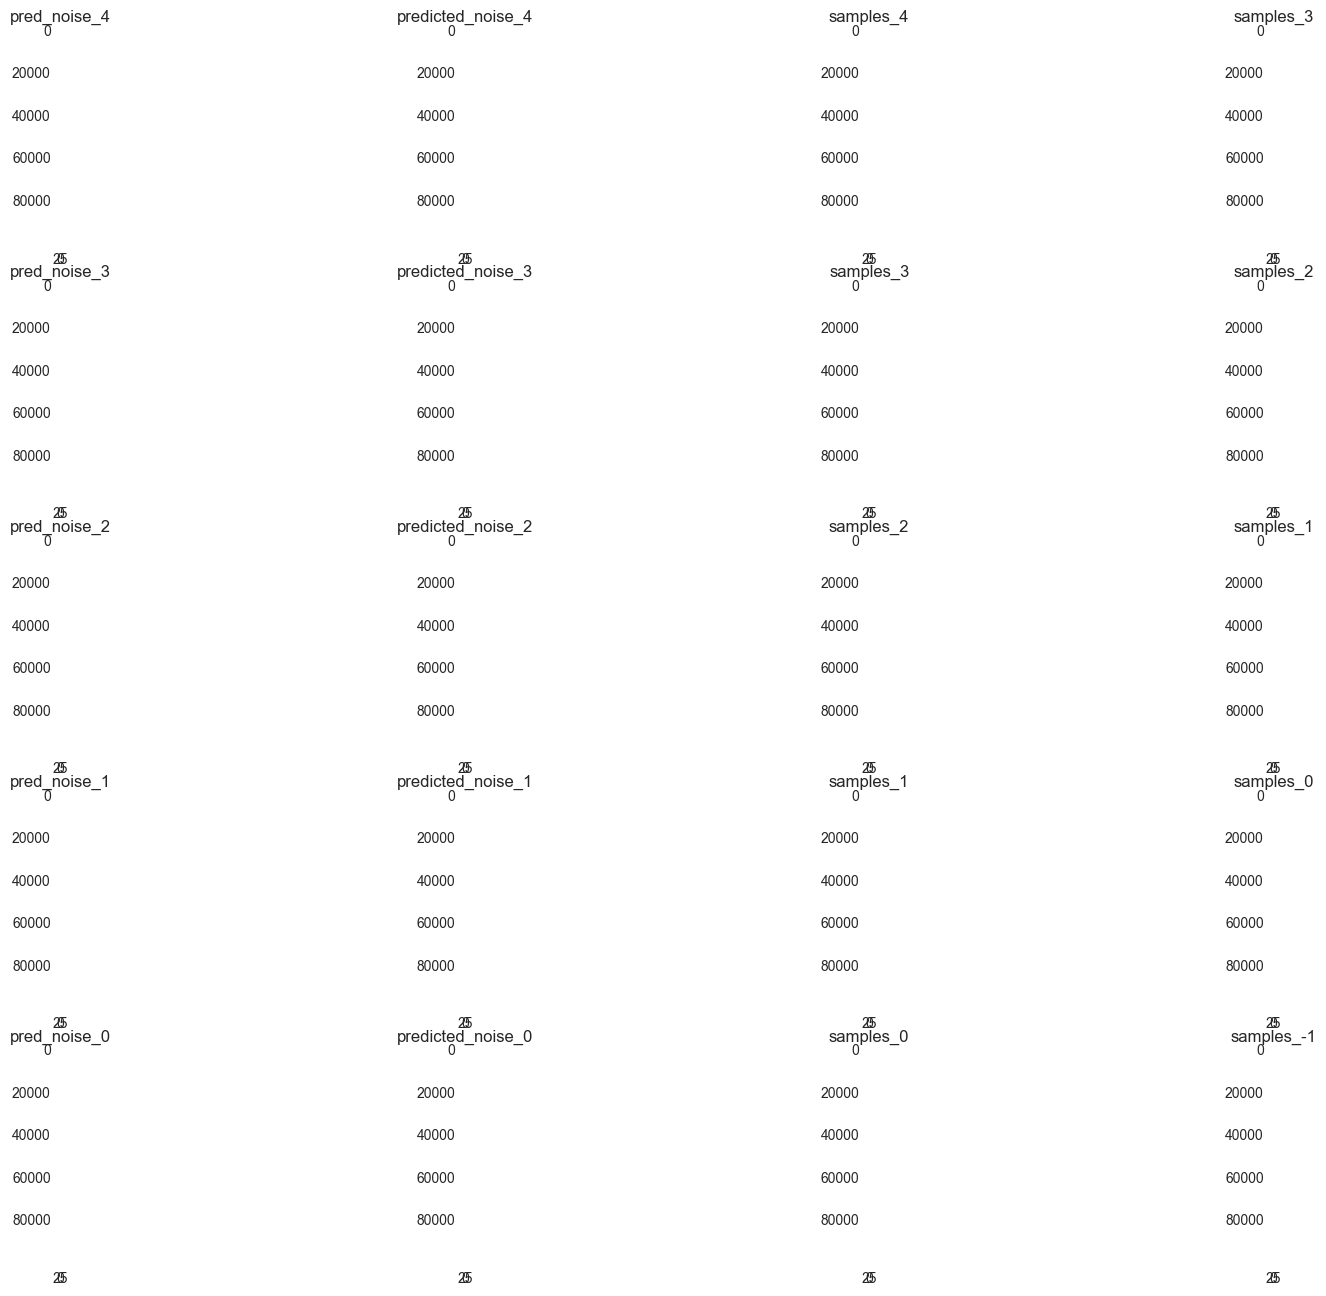

In [33]:
tablediffusion_synth = TableDiffusion_Synthesiser(
    cuda=False, mlflow_logging=False, epsilon_target=500, delta=delta, epoch_target=60
)
tablediffusion_synth.fit(
    data, discrete_columns=["gender", "canton"], n_epochs=60, verbose=False
)
tablediffusion_synth_data = tablediffusion_synth.sample(synth_sample_size)

In [34]:
tablediffusion_synth_data.to_csv("tablediffusion_synth_data.csv", index=False)

# Comparison

In [8]:
def plot_distribution_comparison(real_data, synth_data, column, bins=50):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        real_data[column], kde=True, color="blue", alpha=0.5, bins=bins, label="Real"
    )
    sns.histplot(
        synth_data[column],
        kde=True,
        color="red",
        alpha=0.5,
        bins=bins,
        label="Synthetic",
    )
    plt.title(f"Distribution Comparison: {column}")
    plt.legend()
    plt.show()


def plot_distribution_comparison_layout(real_data, synthetic_data):
    """
    Compare the distributions of all columns from real and synthetic data
    and display them in a layout with 3 plots per row, using appropriate plots for categorical and numeric data.

    :param real_data: The original data as a DataFrame.
    :param synthetic_data: The synthetic data as a DataFrame.
    """
    num_columns = len(real_data.columns)
    num_rows = math.ceil(num_columns / 6)  # Determine number of rows needed

    fig, axes = plt.subplots(
        num_rows, 6, figsize=(18, 3 * num_rows)
    )  # Create subplots grid
    axes = axes.flatten()  # Flatten the 2D grid into 1D for easy iteration

    for idx, col in enumerate(real_data.columns):
        if real_data[col].dtype in [
            "int64",
            "float64",
            "datetime64",
        ]:  # Numeric or datetime columns
            # Plot KDE for real data
            sns.kdeplot(
                real_data[col],
                label="Real Data",
                color="blue",
                fill=True,
                alpha=0.5,
                ax=axes[idx],
            )

            # Plot KDE for synthetic data
            sns.kdeplot(
                synthetic_data[col],
                label="Synthetic Data",
                color="orange",
                fill=True,
                alpha=0.5,
                ax=axes[idx],
            )

        else:  # Categorical columns
            # Plot countplot for real data
            sns.histplot(
                real_data[col],
                label="Real Data",
                color="blue",
                alpha=0.5,
                ax=axes[idx],
                stat="density",
                discrete=True,
            )

            # Plot countplot for synthetic data
            sns.histplot(
                synthetic_data[col],
                label="Synthetic Data",
                color="orange",
                alpha=0.5,
                ax=axes[idx],
                stat="density",
                discrete=True,
            )

        # Set the title and labels
        axes[idx].set_title(f"Distribution Comparison: {col}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(
            "Density"
            if real_data[col].dtype in ["int64", "float64", "datetime64"]
            else "Frequency"
        )
        axes[idx].legend()

    # Hide any empty subplots if the number of columns is not divisible by 3
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()  # Adjust layout so plots don't overlap
    plt.show()

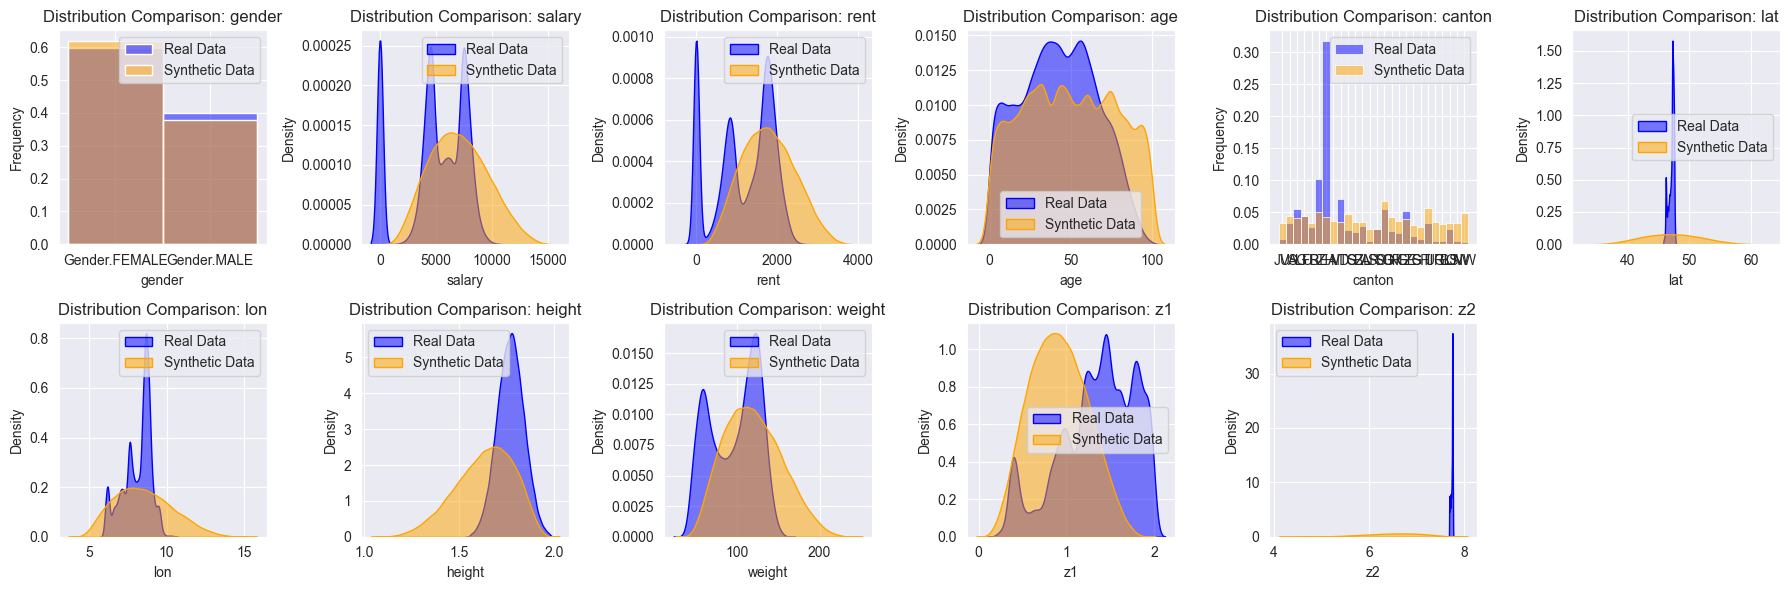

In [5]:
pate_ctgan_synth_data = pd.read_csv("pate_ctgan_synth_data.csv")
plot_distribution_comparison_layout(data, pate_ctgan_synth_data)

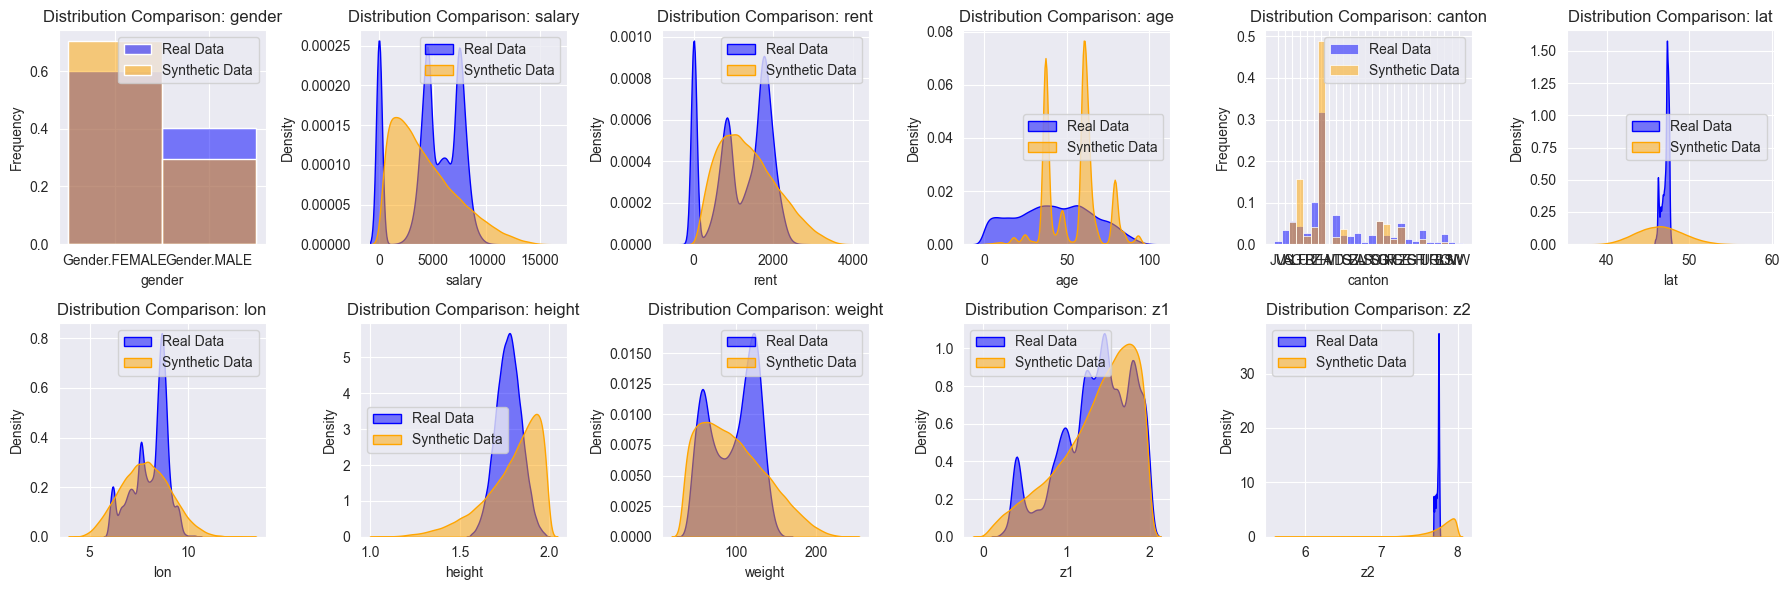

In [6]:
dp_ctgan_synth_data = pd.read_csv("dp_ctgan_synth_data.csv")
plot_distribution_comparison_layout(data, dp_ctgan_synth_data)

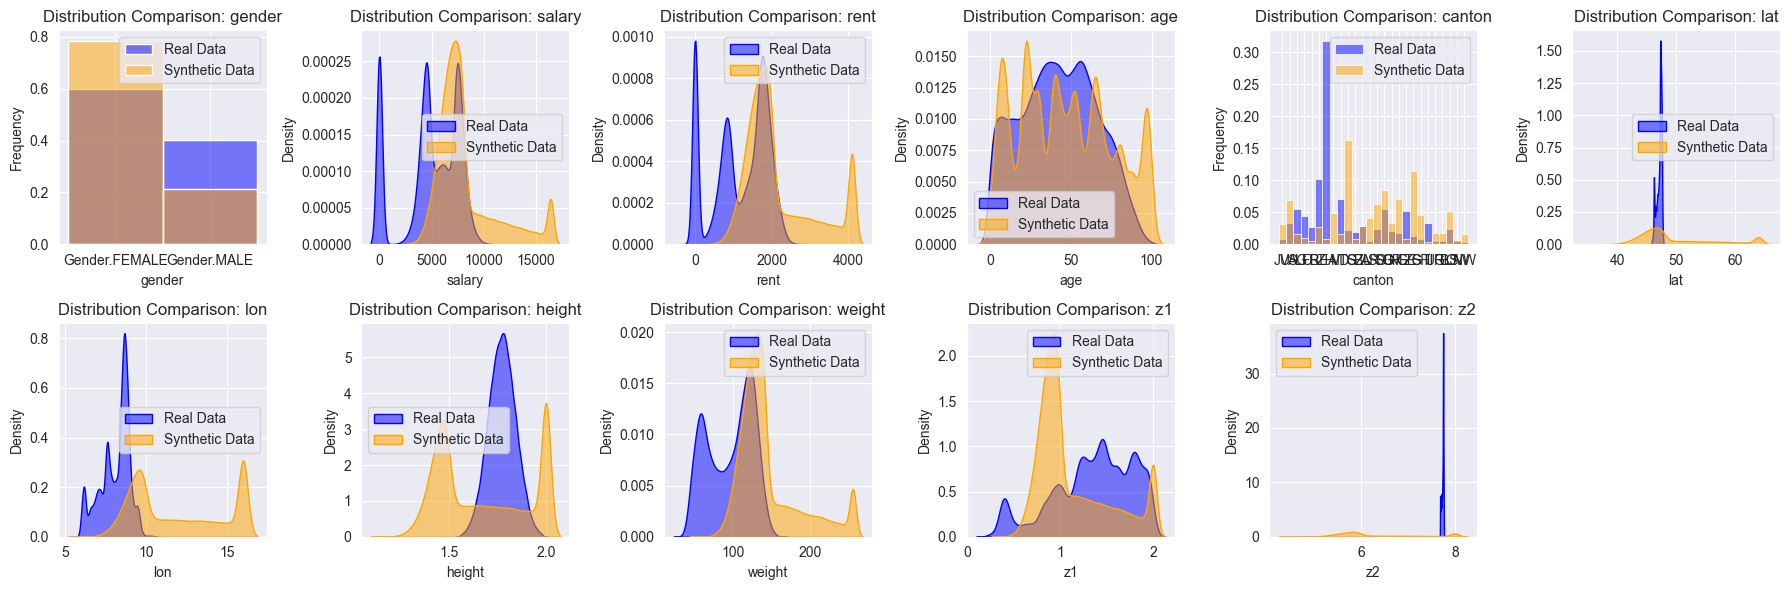

In [7]:
pate_gan_synth_data = pd.read_csv("pate_gan_synth_data.csv")
plot_distribution_comparison_layout(data, pate_gan_synth_data)

In [ ]:
dp_gan_synth_data = pd.read_csv("dp_gan_synth_data.csv")
plot_distribution_comparison_layout(data, dp_gan_synth_data)

In [ ]:
pac_synth_data = pd.read_csv("pac_synth_data.csv")
plot_distribution_comparison_layout(data, pac_synth_data)

In [ ]:
mst_synth_data = pd.read_csv("mst_synth_data.csv")
plot_distribution_comparison_layout(data, mst_synth_data)

In [ ]:
mst_synth_data = pd.read_csv("mst_synth_data.csv")
plot_distribution_comparison_layout(data, mst_synth_data)

In [ ]:
mwem_synth_data = pd.read_csv("mwem_synth_data.csv")
plot_distribution_comparison_layout(data, mwem_synth_data)

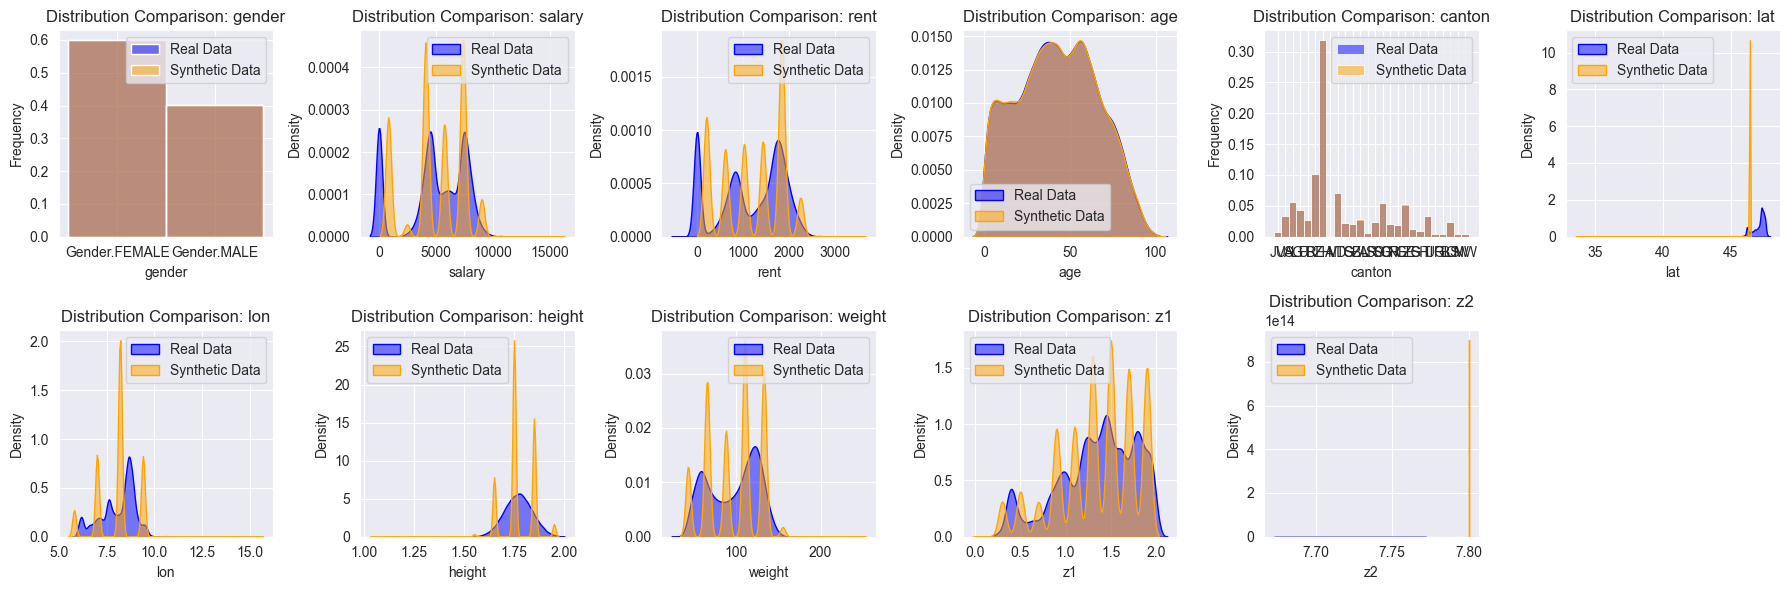

In [13]:
aim_synth_data = pd.read_csv("aim_synth_data.csv")
plot_distribution_comparison_layout(data, aim_synth_data)

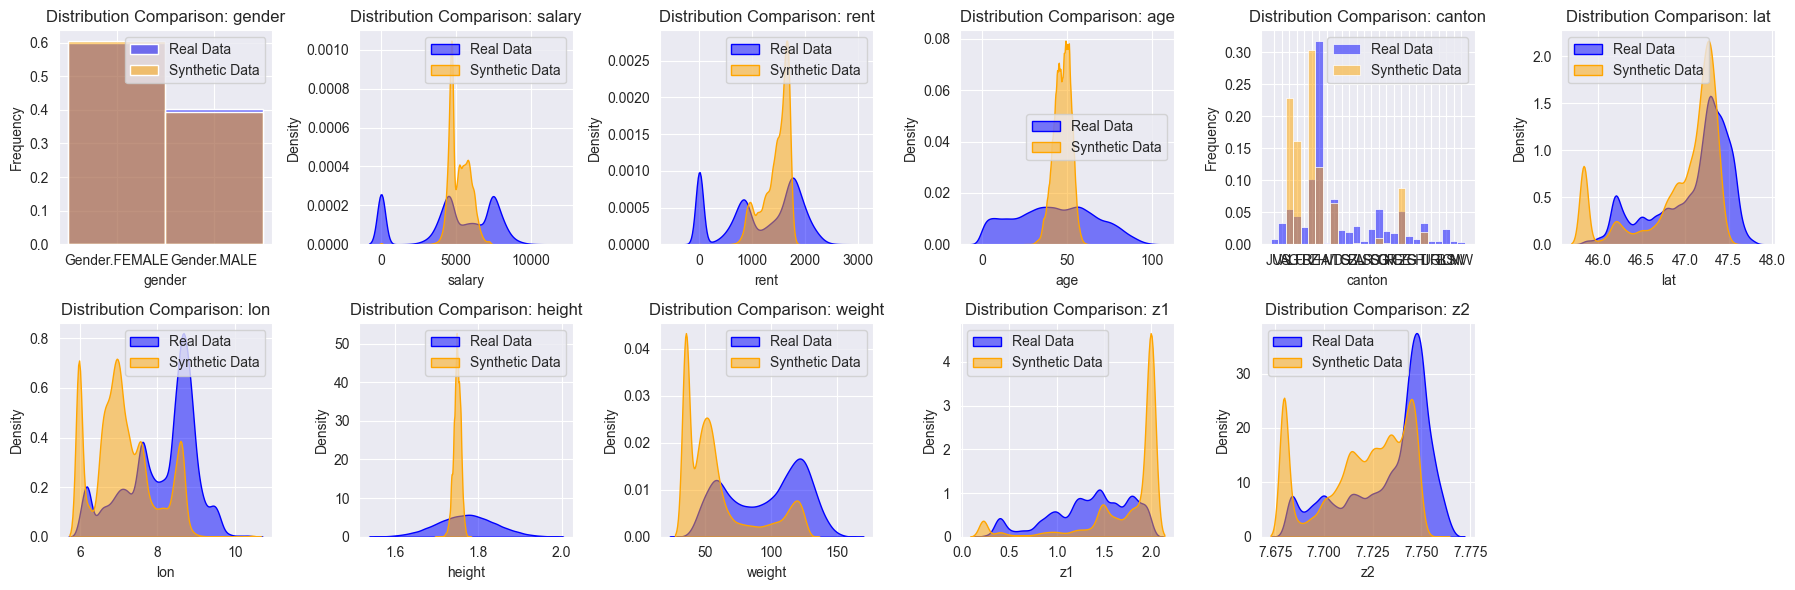

In [35]:
tablediffusion_synth_data = pd.read_csv("tablediffusion_synth_data.csv")
plot_distribution_comparison_layout(data, tablediffusion_synth_data)

# TODO

- test PGM, PrivSyn und TableDiffusion
- decrease sigma
- implement further evaluation metrics